In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import math
from sklearn import decomposition
import collections

### Zobrazení prostoru testovaných sad parametrů
- Využití metody PCA
- Červeně jsou zvýrazněny parametry, u kterých došlo k opakovanému pádu jádra operačního systému nebo predikce nemohla být určena kvůli špatným hodnotám

In [2]:
param = []
with open('../Data/Mouse_optim/param_index.pickle', "rb") as file:
    param = np.array(pickle.load(file))
    file.close()

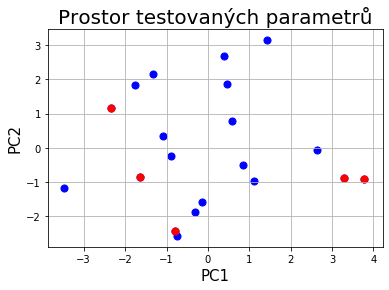

In [3]:
pca = decomposition.PCA(n_components=2)

fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('Prostor testovaných parametrů', fontsize = 20)
ax.scatter(pca.fit_transform(param)[:,0], pca.fit_transform(param)[:,1], c = 'b', s = 50)
ax.scatter(pca.fit_transform(param)[[8,12,13,16,17],0], pca.fit_transform(param)[[8,12,13,16,17],1], c = 'r', s = 50)
ax.grid()

### Zobrazení výsledků s třemi sadami výsledků
- Jelikož výsledky se moc nelišily a v pozdějších sadách parametrů docházelo k častému padání jádra operačního systému, tak jsem u dalších sad testovala sady pouze jedenkrát.
- K výběru nejlepší sady parametrů použiji pouze první výsledky - v grafech jsou zvýrazněny červeně.


In [4]:
folder = '../Data/Mouse_optim/'
data_metrics = []

for i in range(1,7):
    for j in range(1,4):
        with open(folder+str(i)+'/'+str(j)+'_metrics.pickle', "rb") as file:
            m = pickle.load(file)
            data_metrics.append(m)
i = 8           
for j in range(1,4):
    with open(folder+str(i)+'/'+str(j)+'_metrics.pickle', "rb") as file:
        m = pickle.load(file)
        data_metrics.append(m)

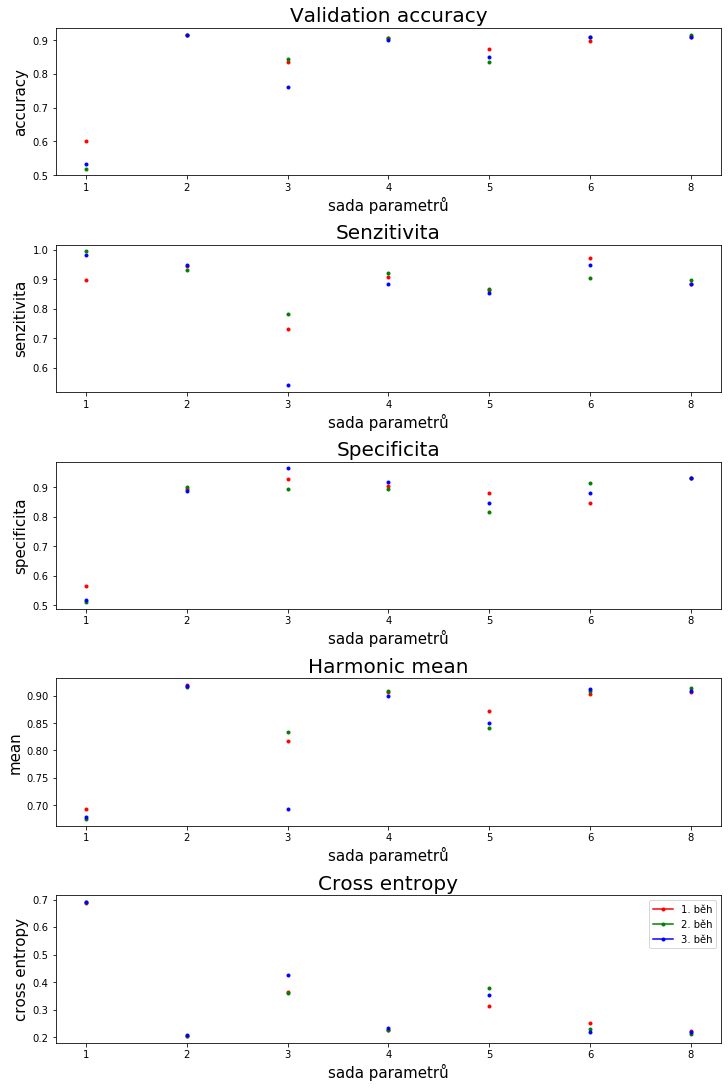

In [5]:
fig, axs = plt.subplots(5, 1, constrained_layout=True,figsize=(10,15))

step = 0
for i in range(0,len(data_metrics),3):
    axs[0].plot(step, data_metrics[i][0], marker='o', markersize=3, color="red") 
    axs[0].plot(step, data_metrics[i+1][0], marker='o', markersize=3, color="green")
    axs[0].plot(step, data_metrics[i+2][0], marker='o', markersize=3, color="blue")
    step += 1  
axs[0].set_title('Validation accuracy', fontsize = 20)
axs[0].set_xlabel('sada parametrů', fontsize = 15)
axs[0].set_ylabel('accuracy', fontsize = 15)

step = 0
for i in range(0,len(data_metrics),3):
    axs[1].plot(step, data_metrics[i][1], marker='o', markersize=3, color="red") 
    axs[1].plot(step, data_metrics[i+1][1], marker='o', markersize=3, color="green")
    axs[1].plot(step, data_metrics[i+2][1], marker='o', markersize=3, color="blue")
    step += 1  
axs[1].set_title('Senzitivita', fontsize = 20)
axs[1].set_xlabel('sada parametrů', fontsize = 15)
axs[1].set_ylabel('senzitivita', fontsize = 15)

step = 0
for i in range(0,len(data_metrics),3):
    axs[2].plot(step, data_metrics[i][2], marker='o', markersize=3, color="red") 
    axs[2].plot(step, data_metrics[i+1][2], marker='o', markersize=3, color="green")
    axs[2].plot(step, data_metrics[i+2][2], marker='o', markersize=3, color="blue")
    step += 1  
axs[2].set_title('Specificita', fontsize = 20)
axs[2].set_xlabel('sada parametrů', fontsize = 15)
axs[2].set_ylabel('specificita', fontsize = 15)

step = 0
for i in range(0,len(data_metrics),3):
    axs[3].plot(step, data_metrics[i][3], marker='o', markersize=3, color="red") 
    axs[3].plot(step, data_metrics[i+1][3], marker='o', markersize=3, color="green")
    axs[3].plot(step, data_metrics[i+2][3], marker='o', markersize=3, color="blue")
    step += 1
axs[3].set_title('Harmonic mean', fontsize = 20)
axs[3].set_xlabel('sada parametrů', fontsize = 15)
axs[3].set_ylabel('mean', fontsize = 15)

step = 0
p1 = []
p2 = []
p3 = []
for i in range(0,len(data_metrics),3):
    p1, = axs[4].plot(step, data_metrics[i][4], marker='o', markersize=3, color="red") 
    p2, = axs[4].plot(step, data_metrics[i+1][4], marker='o', markersize=3, color="green")
    p3, = axs[4].plot(step, data_metrics[i+2][4], marker='o', markersize=3, color="blue")
    step += 1    
axs[4].set_title('Cross entropy', fontsize = 20)
axs[4].set_xlabel('sada parametrů', fontsize = 15)
axs[4].set_ylabel('cross entropy', fontsize = 15)

plt.legend([p1,p2,p3],["1. běh", "2. běh", "3. běh"], loc='upper right')
plt.setp(axs, xticks=np.arange(7),xticklabels=['1', '2', '3', '4', '5', '6', '8'])
plt.show()

### Zobrazení výsledků

In [6]:
folder = '../Data/Mouse_optim/'
data_one_metrics = []
index_param = [1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,19,20]

for i in index_param:
    with open(folder+str(i)+'/1_metrics.pickle', "rb") as file:
        m = pickle.load(file)
        data_one_metrics.append(m)


In [7]:
param_values = []
with open('../Data/Mouse_optim/param_values.pickle', "rb") as file:
    param_values = pickle.load(file)
    file.close()

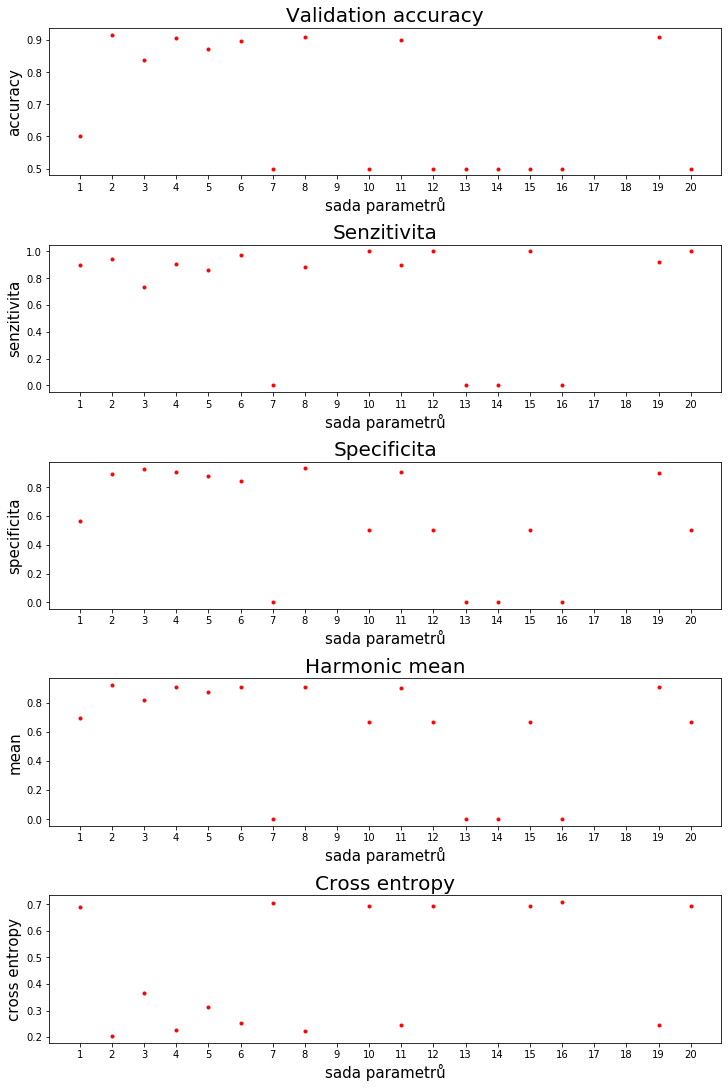

In [8]:
fig, axs = plt.subplots(5, 1, constrained_layout=True,figsize=(10,15))

for i in range(len(data_one_metrics)):
    axs[0].plot(index_param[i], data_one_metrics[i][0], marker='o', markersize=3, color="red") 
    axs[1].plot(index_param[i], data_one_metrics[i][1], marker='o', markersize=3, color="red") 
    axs[2].plot(index_param[i], data_one_metrics[i][2], marker='o', markersize=3, color="red")  
    axs[3].plot(index_param[i], data_one_metrics[i][3], marker='o', markersize=3, color="red") 
    axs[4].plot(index_param[i], data_one_metrics[i][4], marker='o', markersize=3, color="red")
    
axs[0].set_title('Validation accuracy', fontsize = 20)
axs[0].set_xlabel('sada parametrů', fontsize = 15)
axs[0].set_ylabel('accuracy', fontsize = 15)

axs[1].set_title('Senzitivita', fontsize = 20)
axs[1].set_xlabel('sada parametrů', fontsize = 15)
axs[1].set_ylabel('senzitivita', fontsize = 15)

axs[2].set_title('Specificita', fontsize = 20)
axs[2].set_xlabel('sada parametrů', fontsize = 15)
axs[2].set_ylabel('specificita', fontsize = 15)

axs[3].set_title('Harmonic mean', fontsize = 20)
axs[3].set_xlabel('sada parametrů', fontsize = 15)
axs[3].set_ylabel('mean', fontsize = 15)

axs[4].set_title('Cross entropy', fontsize = 20)
axs[4].set_xlabel('sada parametrů', fontsize = 15)
axs[4].set_ylabel('cross entropy', fontsize = 15)

plt.setp(axs, xticks=np.arange(1,21))
plt.show()

### Nalezení nejlepší sady parametrů

In [9]:
o_acc = {}
o_sen = {}
o_spec = {}
o_mean = {}
o_ce = {}

step = 0
for i in index_param:
    o_acc[i] = data_one_metrics[step][0]
    o_sen[i] = data_one_metrics[step][1]
    o_spec[i] = data_one_metrics[step][2]
    o_mean[i] = data_one_metrics[step][3]
    o_ce[i] = data_one_metrics[step][4]
    step += 1

In [10]:
print('Validation accuracy:')
s_acc = collections.OrderedDict(sorted(o_acc.items(), key=lambda t: t[1], reverse=True))
for k, v in s_acc.items(): 
    print ('\t',k, '\t',v)

print('Senzitivita:')
s_sen = collections.OrderedDict(sorted(o_sen.items(), key=lambda t: t[1], reverse=True))
for k, v in s_acc.items(): 
    print ('\t',k, '\t',v)
    
print('Specificita:')
s_spec = collections.OrderedDict(sorted(o_spec.items(), key=lambda t: t[1], reverse=True))
for k, v in s_acc.items(): 
    print ('\t',k, '\t',v)

print('Harmonic mean:')
s_mean = collections.OrderedDict(sorted(o_mean.items(), key=lambda t: t[1], reverse=True))
for k, v in s_acc.items(): 
    print ('\t',k, '\t',v)

print('Cross Entropy:')
s_ce = collections.OrderedDict(sorted(o_ce.items(), key=lambda t: t[1]))
for k, v in s_ce.items(): 
    print ('\t',k, '\t',v)

Validation accuracy:
	 2 	 0.91710526
	 8 	 0.9095614
	 19 	 0.9082456
	 4 	 0.90657896
	 11 	 0.9004386
	 6 	 0.89701754
	 5 	 0.872807
	 3 	 0.8367544
	 1 	 0.60245615
	 7 	 0.5
	 10 	 0.5
	 12 	 0.5
	 13 	 0.5
	 14 	 0.5
	 15 	 0.5
	 16 	 0.5
	 20 	 0.5
Senzitivita:
	 2 	 0.91710526
	 8 	 0.9095614
	 19 	 0.9082456
	 4 	 0.90657896
	 11 	 0.9004386
	 6 	 0.89701754
	 5 	 0.872807
	 3 	 0.8367544
	 1 	 0.60245615
	 7 	 0.5
	 10 	 0.5
	 12 	 0.5
	 13 	 0.5
	 14 	 0.5
	 15 	 0.5
	 16 	 0.5
	 20 	 0.5
Specificita:
	 2 	 0.91710526
	 8 	 0.9095614
	 19 	 0.9082456
	 4 	 0.90657896
	 11 	 0.9004386
	 6 	 0.89701754
	 5 	 0.872807
	 3 	 0.8367544
	 1 	 0.60245615
	 7 	 0.5
	 10 	 0.5
	 12 	 0.5
	 13 	 0.5
	 14 	 0.5
	 15 	 0.5
	 16 	 0.5
	 20 	 0.5
Harmonic mean:
	 2 	 0.91710526
	 8 	 0.9095614
	 19 	 0.9082456
	 4 	 0.90657896
	 11 	 0.9004386
	 6 	 0.89701754
	 5 	 0.872807
	 3 	 0.8367544
	 1 	 0.60245615
	 7 	 0.5
	 10 	 0.5
	 12 	 0.5
	 13 	 0.5
	 14 	 0.5
	 15 	 0.5
	 16 	 0.5
	 20 

### Zobrazení průběhu učení nejlepších modelů
- Nejlépe vycházela sada 2 a následně sada 8, a proto jsem se podívala na průběhy učení
- accuracy a loss v průběhu času


In [11]:
folder = '../Data/Mouse_optim/'
data_accloss = []

for i in [2,8]:
    with open(folder+str(i)+'/1_accloss.pickle', "rb") as file:
        accloss = pickle.load(file)
        data_accloss.append(accloss)

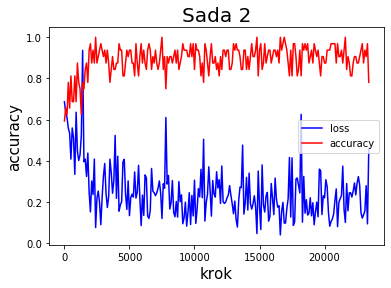

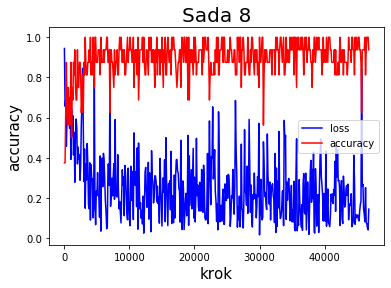

In [12]:
i = 0
best = ['2','8']
for accloss in data_accloss:
    fig, ax = plt.subplots()
    ax.plot(accloss['step'],accloss['loss'],'b',label='loss')
    ax.plot(accloss['step'],accloss['train_acc'],'r',label='accuracy')
    leg = ax.legend()
    plt.title('Sada '+ best[i], fontsize = 20)
    ax.set_xlabel('krok', fontsize = 15)
    ax.set_ylabel('accuracy', fontsize = 15)
    i += 1


Na základě těchto výsledků jsem vybrala sadu 2 pro konečné testování na lidských datech.